In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_csv('./seeds.csv')
print(df.head())

# Features and variety
target = df['grain_variety']
data = np.array(df.drop('grain_variety', axis=1)).T

    area  perimeter  compactness  length  width  asymmetry_coefficient  \
0  15.26      14.84       0.8710   5.763  3.312                  2.221   
1  14.88      14.57       0.8811   5.554  3.333                  1.018   
2  14.29      14.09       0.9050   5.291  3.337                  2.699   
3  13.84      13.94       0.8955   5.324  3.379                  2.259   
4  16.14      14.99       0.9034   5.658  3.562                  1.355   

   groove_length grain_variety  
0          5.220    Kama wheat  
1          4.956    Kama wheat  
2          4.825    Kama wheat  
3          4.805    Kama wheat  
4          5.175    Kama wheat  


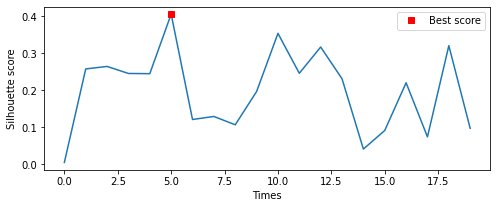

In [2]:
# Non Negative Matrix Factorization
def update_H(W, H, V):
    numerator = W.T.dot(V)
    denominator = W.T.dot(W).dot(H) + 1e-10
    H = H*(numerator / denominator)
    return H

def update_W(W, H, V):
    numerator = V.dot(H.T)
    denominator = W.dot(H).dot(H.T) + 1e-10
    W = W*(numerator / denominator)
    return W

def do_nnmf(V, rank=10, iter=100):
    # Initialize 
    n, m = V.shape
    W = np.abs(np.random.randn(1, n, rank))[0]
    H = np.abs(np.random.randn(1, rank, m))[0]
    
    loss = []
    for i in range(iter):
        H = update_H(W, H, V)
        W = update_W(W, H, V)
        loss.append(sum((V - W.dot(H)).flatten()**2))
    return H, W, loss

# Perform NNMF
repeat_times = 20 
cluster_id = []
for i in range(repeat_times):
    H, W, loss = do_nnmf(data, rank=3, iter=500)
    temp = []
    for x in range(H.shape[1]):
        temp.append(np.where(np.max(H[:, x]) == H[:, x])[0][0])
    cluster_id.append(temp)

# Calculate silhouette scores, draw a line chat and find the best
silhouette_scores = [silhouette_score(data.T, label) for label in cluster_id]
best_index = np.argmax(silhouette_scores)
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(silhouette_scores)
plt.xlabel('Times')
plt.ylabel('Silhouette score')
plt.plot(best_index, best_score, 'rs', label='Best score')
plt.legend(loc=0)
plt.show()

In [3]:
# The best cluster
result = pd.Series(cluster_id[best_index], name='cluster_results')

# Crosstab
ct = pd.crosstab(target, result)
ct

cluster_results,0,1,2
grain_variety,,,
Canadian wheat,51,19,0
Kama wheat,4,61,5
Rosa wheat,1,2,67
